In [43]:
import pandas as pd
import requests
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# RSV Vaccine Disparities Among Pregnant Women

intro/background/context

research questions

table of contents

## Step 1: Get RSV Data

In [44]:
data_url ="https://data.cdc.gov/resource/g4jn-64pd.json"
data_file = requests.get(data_url)
data_file = data_file.json()
print(data_file)

[{'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'American Indian / Alaska Native, NH', 'cover_estimate': '0', 'denominator': '49', 'date_order': '1', 'race_order': '1', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Asian, NH', 'cover_estimate': '0', 'denominator': '2811', 'date_order': '1', 'race_order': '2', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Black, NH', 'cover_estimate': '0', 'denominator': '1265', 'date_order': '1', 'race_order': '3', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Hispanic/Latino', 'cover_estimate': '0', 'denominator': '6809', 'date_order': '1', 'race_order': '4', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Multiple/Other, NH', 'cover_estimate': '0', 'denominator': '714', 'date_order': '1', 'race_order': '5', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Na

# Create DataFrame For Results: Question A

In [45]:
weekly_disparities_list = []
grouped_by_week = defaultdict(list)
    # filter data to answer question
for item in data_file:
    cover_estimate = float(item.get("cover_estimate"))
    if (cover_estimate) == 0:
        weekly_disparities_list.append({
                "week_ending_date": item.get("week_ending_date"),
                "demographic": item.get("demographic"),
                "num_pregnant_women": item.get("denominator")
            })
        


weekly_disparities_df =  pd.DataFrame(weekly_disparities_list)
weekly_disparities_df["week_ending_date"] = pd.to_datetime(weekly_disparities_df["week_ending_date"])
weekly_disparities_df.columns = ["Week_Ending_Date", "Demographics", "Num_Pregnant_Women"]
print(weekly_disparities_df)



   Week_Ending_Date                            Demographics Num_Pregnant_Women
0        2023-09-30     American Indian / Alaska Native, NH                 49
1        2023-09-30                               Asian, NH               2811
2        2023-09-30                               Black, NH               1265
3        2023-09-30                         Hispanic/Latino               6809
4        2023-09-30                      Multiple/Other, NH                714
5        2023-09-30  Native Hawaiian / Pacific Islander, NH                115
6        2023-09-30                                 Overall              18580
7        2023-09-30                                 Unknown                815
8        2023-09-30                               White, NH               6002
9        2023-10-07     American Indian / Alaska Native, NH                 58
10       2023-10-07                               Asian, NH               3214
11       2023-10-07                               Bl

# Visualize Results: Question A

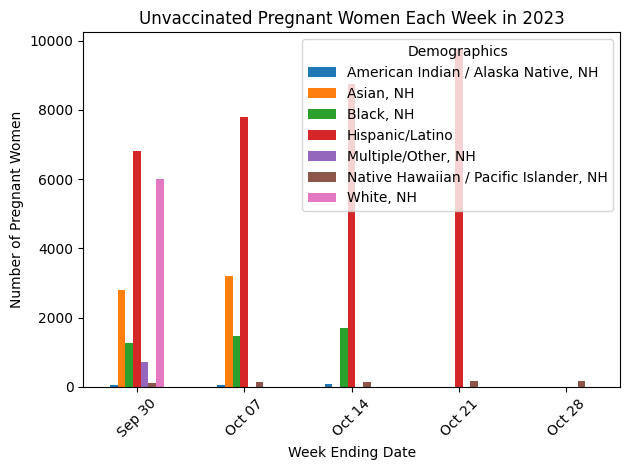

In [46]:
# clean up data
# filter the df to remove those without an actual race/ethnicity
filtered_df = weekly_disparities_df[
    ~weekly_disparities_df["Demographics"].isin(["Overall", "Unknown"])
]

# drop rows with missing date or missing counts
filtered_df = filtered_df.dropna(subset=["Week_Ending_Date", "Num_Pregnant_Women"])

# make sure num_pregnant_women data is numeric
filtered_df["Num_Pregnant_Women"] = pd.to_numeric(filtered_df["Num_Pregnant_Women"], errors="coerce")

# reshapes and summarizes data. turns it into matrix view
pivot_df = filtered_df.pivot_table(
    index="Week_Ending_Date",
    columns="Demographics",
    values="Num_Pregnant_Women",
    aggfunc="sum"
)

# changes date time of week ending date
pivot_df.index = pivot_df.index.strftime("%b %d")

# plot bar
ax = pivot_df.plot(kind="bar")
ax.set_title("Unvaccinated Pregnant Women Each Week in 2023")
ax.set_xlabel("Week Ending Date")
ax.set_ylabel("Number of Pregnant Women")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Create DataFrame for Results: Question B

In [47]:
disparities_over_time = []
for item in data_file:
    disparities_over_time.append({
        "week_ending_date": item.get("week_ending_date"),
        "percent_vaccinated": item.get("cover_estimate"),
        "demographic": item.get("demographic")
        })
disparities_over_time_df = pd.DataFrame(disparities_over_time)
disparities_over_time_df["week_ending_date"] = pd.to_datetime(disparities_over_time_df["week_ending_date"])
disparities_over_time_df.columns = ["Week_Ending_Date","Percent_Vaccinated", "Demographics"]
print(disparities_over_time_df)

    Week_Ending_Date Percent_Vaccinated  \
0         2023-09-30                  0   
1         2023-09-30                  0   
2         2023-09-30                  0   
3         2023-09-30                  0   
4         2023-09-30                  0   
..               ...                ...   
166       2024-02-03               17.9   
167       2024-02-03               16.9   
168       2024-02-03               17.8   
169       2024-02-03               12.6   
170       2024-02-03               19.9   

                               Demographics  
0       American Indian / Alaska Native, NH  
1                                 Asian, NH  
2                                 Black, NH  
3                           Hispanic/Latino  
4                        Multiple/Other, NH  
..                                      ...  
166                      Multiple/Other, NH  
167  Native Hawaiian / Pacific Islander, NH  
168                                 Overall  
169                    

# Visualize Results: Question B

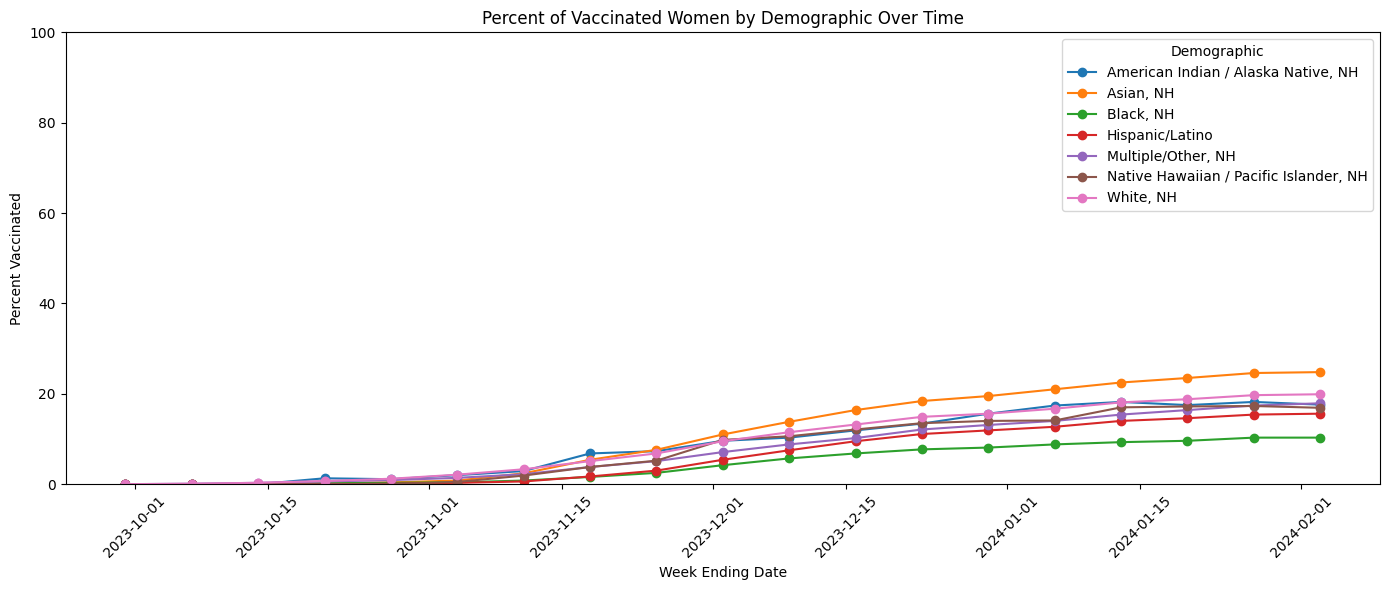

In [48]:

filtered_df = disparities_over_time_df[
    ~disparities_over_time_df["Demographics"].isin(["Overall", "Unknown"])
]

filtered_df = filtered_df.dropna(subset=["Week_Ending_Date", "Percent_Vaccinated"])

filtered_df["Percent_Vaccinated"] = pd.to_numeric(filtered_df["Percent_Vaccinated"], errors="coerce")

pivot_df = filtered_df.pivot_table(
    index="Week_Ending_Date",
    columns="Demographics",
    values="Percent_Vaccinated",
    aggfunc="mean"
)

plt.figure(figsize=(14, 6))

for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker="o", label=column)

pivot_df.index = pivot_df.index.strftime("%b %d")

plt.title("Percent of Vaccinated Women by Demographic Over Time")
plt.xlabel("Week Ending Date")
plt.ylabel("Percent Vaccinated")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title="Demographic")
plt.tight_layout()
plt.show()




